In [ ]:
import numpy as np,pandas as pd

df=pd.read_csv('/content/drive/MyDrive/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

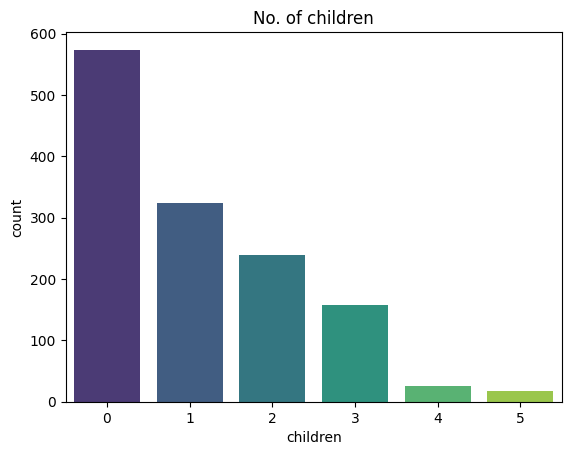

In [ ]:
import matplotlib.pyplot as plt,seaborn as sns

sns.countplot(x=df['children'],palette='viridis')
plt.title('No. of children')
plt.show()

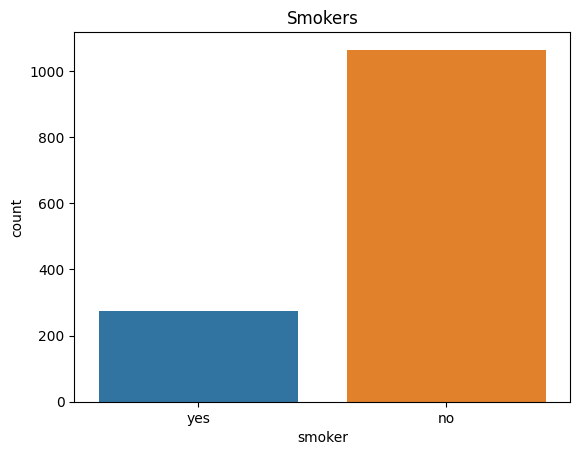

In [ ]:
sns.countplot(x=df['smoker'])
plt.title('Smokers')
plt.show()

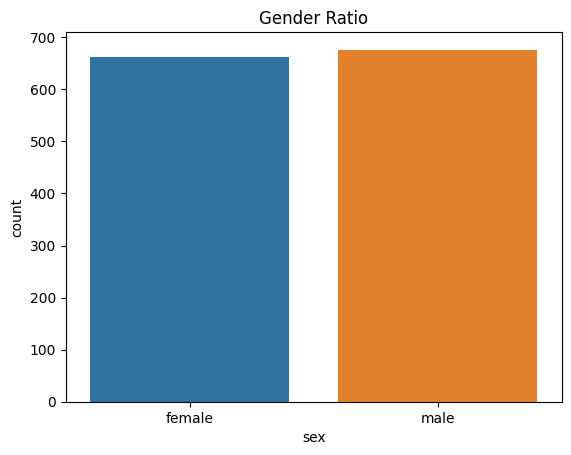

In [ ]:
sns.countplot(x=df['sex'])
plt.title('Gender Ratio')
plt.show()

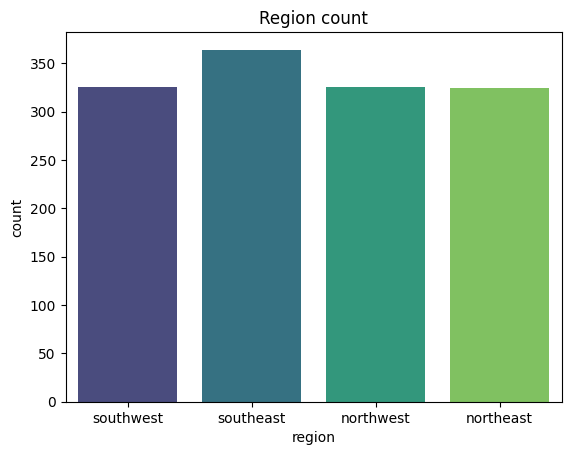

In [ ]:
sns.countplot(x=df['region'],palette='viridis')
plt.title('Region count')
plt.show()

In [ ]:
clean={
    'sex' : { 'male' : 0, 'female' : 1 },
    'smoker' : { 'no' : 0, 'yes' : 1 },
    'region' : { 'northwest' : 0, 'northeast' : 1, 'southwest' : 2, 'southeast' : 3 }
}
print(clean)

{'sex': {'male': 0, 'female': 1}, 'smoker': {'no': 0, 'yes': 1}, 'region': {'northwest': 0, 'northeast': 1, 'southwest': 2, 'southeast': 3}}


In [ ]:
df=df.replace(clean)
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,3,1725.55230
2,28,0,33.000,3,0,3,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,3,1629.83350
1336,21,1,25.800,0,0,2,2007.94500


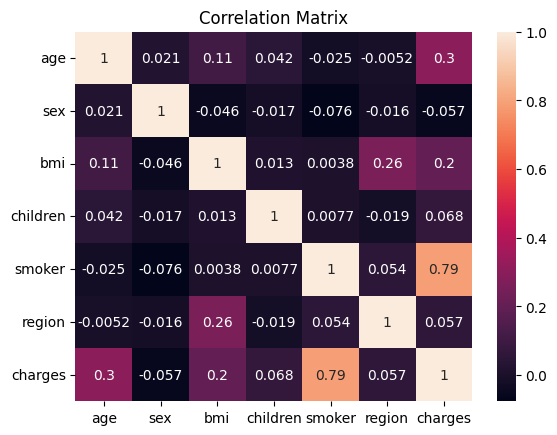

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df=df.drop('region',axis=1)
df=df.drop('sex',axis=1)
df=df.drop('children',axis=1)
df

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,0,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X

,age,bmi,smoker
0,19,27.900,1
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,0
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=13)
lr=LinearRegression()
lr.fit(Xtrain,ytrain)
ytrainpred=lr.predict(Xtrain)
ytestpred=lr.predict(Xtest)
print(".............Linear Regression Model............")
print("Train MSE: ",mean_squared_error(ytrain,ytrainpred))
print("Test MSE: ",mean_squared_error(ytest,ytestpred))
print("Train R-squared score: ",r2_score(ytrain,ytrainpred))
print("Test R-squared score: ",r2_score(ytest,ytestpred))

.............Linear Regression Model............
Train MSE:  39091729.15931703
Test MSE:  28824083.292089507
Train R-squared score:  0.7348521495748839
Test R-squared score:  0.7972105474639248


In [ ]:
from sklearn.tree import DecisionTreeRegressor

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=13)
dtr=DecisionTreeRegressor()
dtr.fit(Xtrain,ytrain)

ytrainpred=dtr.predict(Xtrain)
ytestpred=dtr.predict(Xtest)
print(".............Decision Tree Regressor Model............")
print("Train MSE: ",mean_squared_error(ytrain,ytrainpred))
print("Test MSE: ",mean_squared_error(ytest,ytestpred))
print("Train R-squared score: ",r2_score(ytrain,ytrainpred))
print("Test R-squared score: ",r2_score(ytest,ytestpred))

.............Decision Tree Regressor Model............
Train MSE:  730081.2840366856
Test MSE:  28710790.861333895
Train R-squared score:  0.9950480705954702
Test R-squared score:  0.7980076069844861


In [ ]:
from sklearn.linear_model import Lasso

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=13)
lar=Lasso()
lar.fit(Xtrain,ytrain)

ytrainpred=lar.predict(Xtrain)
ytestpred=lar.predict(Xtest)
print(".............Lasso Regression Model............")
print("Train MSE: ",mean_squared_error(ytrain,ytrainpred))
print("Test MSE: ",mean_squared_error(ytest,ytestpred))
print("Train R-squared score: ",r2_score(ytrain,ytrainpred))
print("Test R-squared score: ",r2_score(ytest,ytestpred))

.............Lasso Regression Model............
Train MSE:  39091735.38602362
Test MSE:  28824347.598181445
Train R-squared score:  0.7348521073409408
Test R-squared score:  0.7972086879602889


In [ ]:
from sklearn.linear_model import Ridge

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=13)
rr=Ridge()
rr.fit(Xtrain,ytrain)

ytrainpred=rr.predict(Xtrain)
ytestpred=rr.predict(Xtest)
print(".............Ridge Regression Model............")
print("Train MSE: ",mean_squared_error(ytrain,ytrainpred))
print("Test MSE: ",mean_squared_error(ytest,ytestpred))
print("Train R-squared score: ",r2_score(ytrain,ytrainpred))
print("Test R-squared score: ",r2_score(ytest,ytestpred))

.............Ridge Regression Model............
Train MSE:  39094754.86922444
Test MSE:  28833325.621035974
Train R-squared score:  0.7348316270629559
Test R-squared score:  0.7971455238235121


In [ ]:
from sklearn.ensemble import RandomForestRegressor

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=13)
rfr=RandomForestRegressor()
rfr.fit(Xtrain,ytrain)

ytrainpred=rfr.predict(Xtrain)
ytestpred=rfr.predict(Xtest)
print(".............Random Forest Regressor Model............")
print("Train MSE: ",mean_squared_error(ytrain,ytrainpred))
print("Test MSE: ",mean_squared_error(ytest,ytestpred))
print("Train R-squared score: ",r2_score(ytrain,ytrainpred))
print("Test R-squared score: ",r2_score(ytest,ytestpred))

.............Random Forest Regressor Model............
Train MSE:  4864772.304810159
Test MSE:  15105937.244119275
Train R-squared score:  0.9670036617164932
Test R-squared score:  0.8937234286781306


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=13)
knr=KNeighborsRegressor()
knr.fit(Xtrain,ytrain)

ytrainpred=knr.predict(Xtrain)
ytestpred=knr.predict(Xtest)
print(".............K-Neighbors Regressor Model............")
print("Train MSE: ",mean_squared_error(ytrain,ytrainpred))
print("Test MSE: ",mean_squared_error(ytest,ytestpred))
print("Train R-squared score: ",r2_score(ytrain,ytrainpred))
print("Test R-squared score: ",r2_score(ytest,ytestpred))

.............K-Neighbors Regressor Model............
Train MSE:  71444175.13621557
Test MSE:  103210736.52032325
Train R-squared score:  0.5154149005391799
Test R-squared score:  0.27386940487555766
